# Langage SQL, les 4 opérations de base

Le langage SQL (Structured Query Language) est le langage informatique permettant de gérer les bases de données relationnelles. 

Il se résume en quatres opérations de base définies dans l'acronyme CRUD (Create, Read, Update, Delete).

- `Create`, permet d'insérer des données avec l'instruction INSERT

- `Read`, permet de lire des données avec l'instruction SELECT

- `Update`, permet de modifier des données avec l'instruction UPDATE

- `Delete`, permet de supprimer des données avec l'instruction DELETE


## Les commentaires

Les commentaires s'écrivent avec --

e.g. : -- ceci est un commentaire

## Syntaxe SQL
Les instructions SQL, ou requêtes SQL, commencent par le nom d'une opération (INSERT, SELECT, UPDATE, DELETE) et se terminent par `;`

Les noms de colonnes qui comportent des majusculent sont entre guillemets "".

Les chaînes de texte (string) sont entre apostrophes ''.

## INSERT

On va reprendre la base de données `learning` créée dans l'unité précendente.

On sélectionne la table `client` et avec un clic droit, on peut accéder aux opérations SQL de cette même table.

On sélectionne Scripts puis INSERT Script.

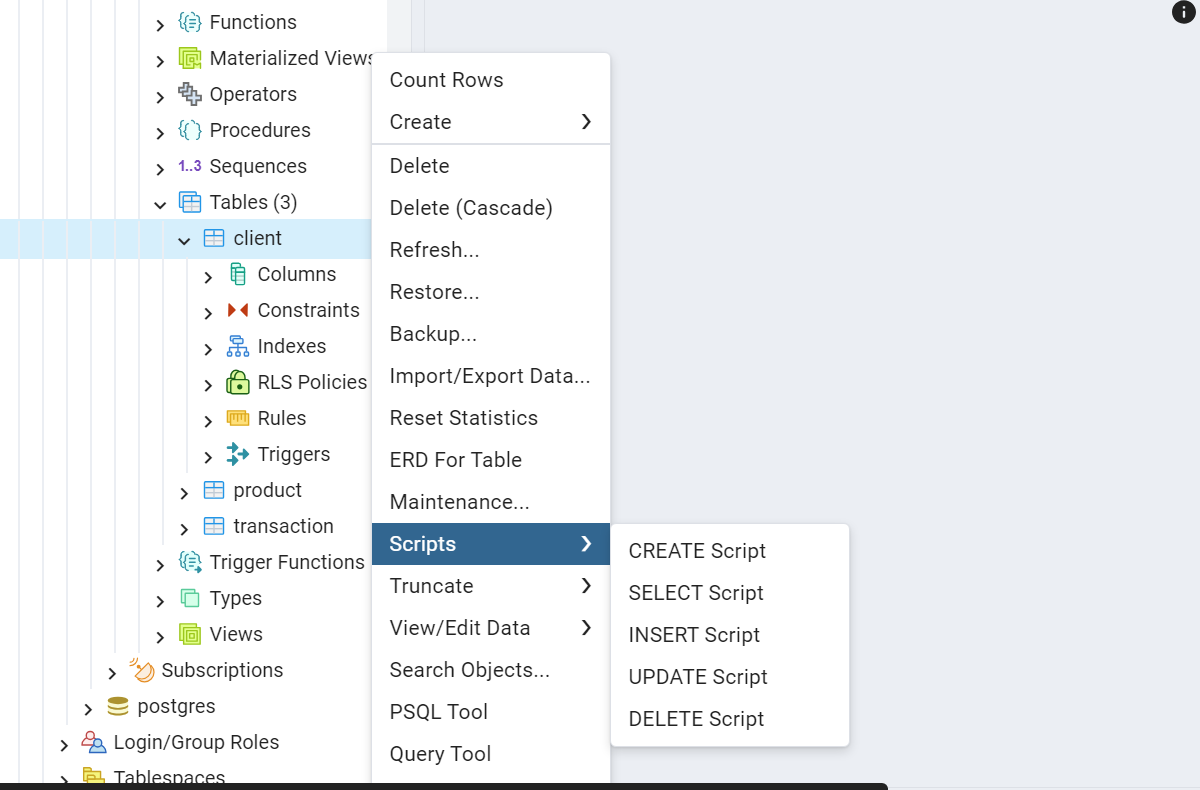

#premières données insérée

-- première requête insert

`INSERT INTO public.client(
	first_name, middle_name, last_name, birth_date, email_address, department)
	VALUES ('Adam', 'Eden', 'Genese', '2000-01-01', 'adam@genese.org', 1);`

NB : on n'a pas besoin d'insérer l'id, de type SERIAL, qui s'auto-incrémente.

On peut ensuite ajouter d'autres informations dans la base

-- deuxième requête insert

`INSERT INTO public.client(
	first_name, middle_name, last_name, birth_date, email_address, department)
	VALUES ('Eve', 'Eden', 'Genese', '2000-01-01', 'eve@genese.org', 1);`

### INSERT et contrainte unique

Si on ajoute ajoute un client avec la même adresse email qu'un autre client, on rencontrera une erreur. 

Dans la leçon précédente, on a ajouté la contrainte email_address unique sur la table `client`.

L'instruction...

-- requête insert avec une erreur de contrainte sur l'adresse email

`INSERT INTO public.client(
	first_name, middle_name, last_name, birth_date, email_address, department)
	VALUES ('Abel', 'Eden', 'Genese', '2024-02-05', 'eve@genese.org', 1);`

...renvoie l'erreur :

ERROR:  Key (email_address)=(eve@genese.org) already exists.duplicate key value violates unique constraint "client_email_address_key" 

ERROR:  duplicate key value violates unique constraint "client_email_address_key"
SQL state: 23505
Detail: Key (email_address)=(eve@genese.org) already exists.

### Ajouter plusieurs données à partir d'un fichier

On peut ajouter un ensemble de données en important un fichier (binary, csv ou text).

Clic droit sur la table, puis Import/export Data...

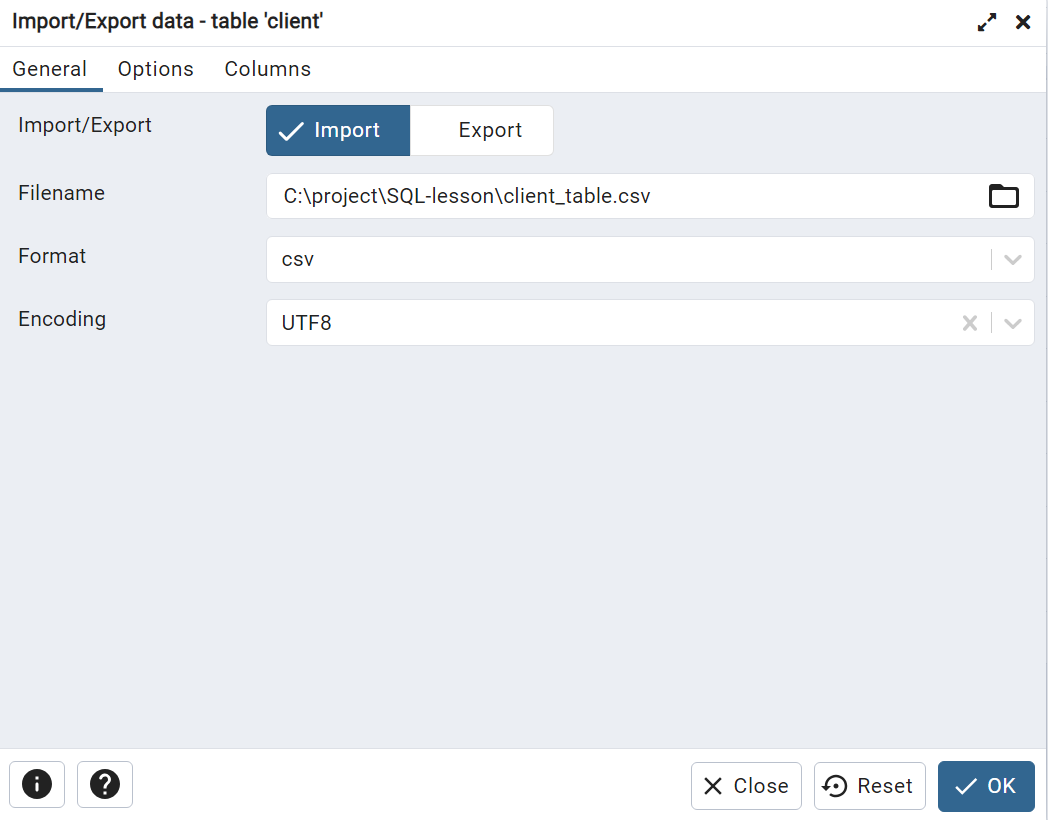

Il faut choisir les options (en-tête de colonnes, séparateur, chaîne de texte nulL) en fonction du format de fichier.

NB : Le nom des colonnes n'est pas important, seul l'ordre compte.

NB2 : La colonne id n'est pas renseignée dans le fichier client_table.csv. On doit supprimer la colonne `id` dans l'onglet Columns > Columns  to import.

De la même façon, on va importer le fichier product_table.csv dans la table `product`

En fonction des `id` des tables `client` et `product`, on va ajouter des ajouter des transactions avec l'instruction INSERT.

Si on ajoute une transaction avec un `client_id` ou un `product_id` qui n'est pas dans les tables `client` et `product` respectivement, on aura l'erreur de clés étrangères.

ERROR:  Key (product_id)=(99) is not present in table "product".insert or update on table "transaction" violates foreign key constraint "product_id_fkey" 

ERROR:  insert or update on table "transaction" violates foreign key constraint "product_id_fkey"
SQL state: 23503
Detail: Key (product_id)=(99) is not present in table "product".

## SELECT

Nous avons désormais des données dans les tables `client`, `product` et `transaction`.

L'instruction SELECT permet de sélectionner et visualiser les données des tables.

Encore une fois, pgAdmin offre un raccourci pour sélectionner toutes les données de la table en faisant un clic droit sur la table.

On sélectionne Scripts puis SELECT Script.

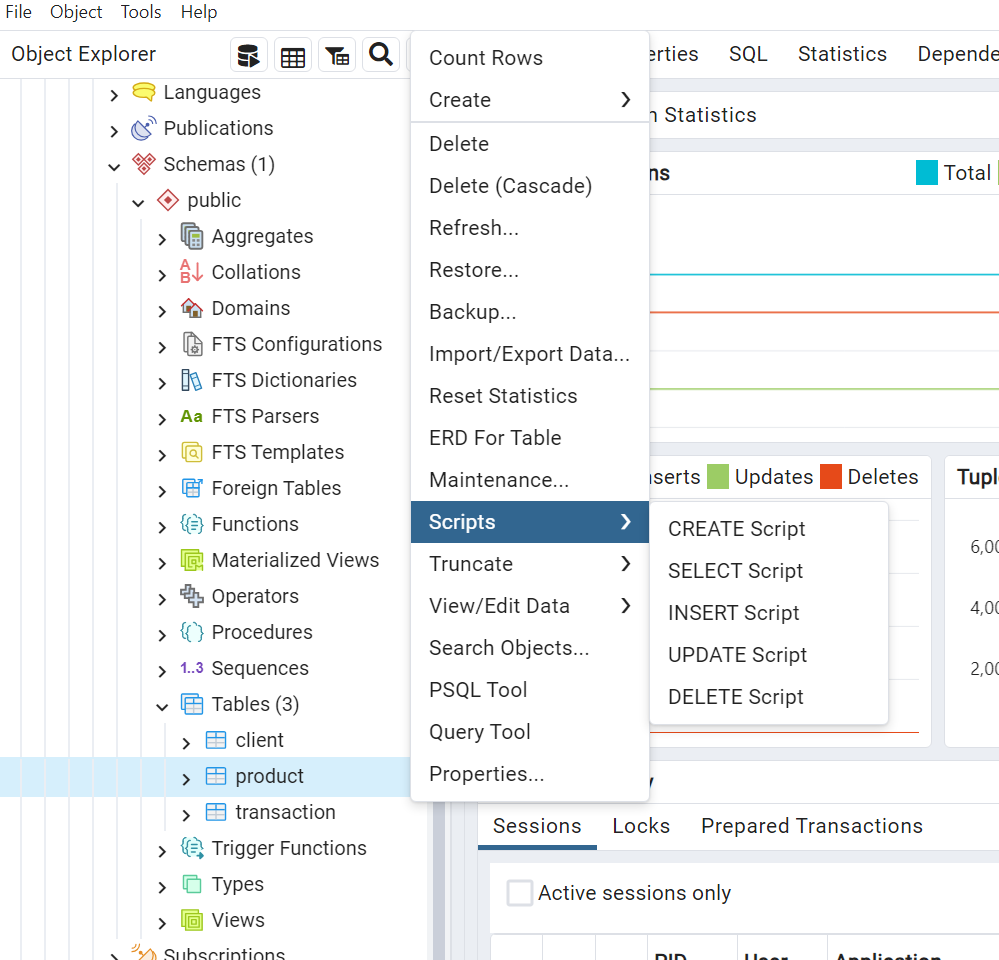

La requête SQL suivante permet de sélectionner toutes les colonnes et toutes les lignes de la table `product`.

`SELECT id, product_name, product_weight, product_description
	FROM public.product;`

### le caractère étoile `*`

Ecrire l'ensemble des noms de colonnes pour toutes les sélectionner peut s'avérer fastidieux. Heureusement, il existe le cactère spécial `*` qui permet de sélectionner toutes les colonnes.

On peut ainsi réécrire la requête SQL pour sélectionner l'ensemble des produits :

SELECT * FROM product;

Attention, sélectionner toutes les colonnes et toutes les lignes d'une table peut engendrer un calcul très long, notamment s'il y a beaucoup de données. Cette instruction peut même casser le système. Nous verrons par la suite comment ajouter des conditions et dans une autre leçon, nous verrons des instructions SELECT avancées.

### Sélectionner quelques colonnes

On peut sélectionner toutes les colonnes, mais on peut aussi sélectionner quelques colonnes. Il suffit d'indiquer les colonnes que l'on souhaite obtenir.

`SELECT  product_name, product_description
	FROM public.product;`

Avant d'aller plus loin sur l'opération `SELECT` et de voir les opérations `UPDATE` et `DELETE`, nous allons étudier les conditions `WHERE` et les opérateurs logiques dans la prochaine leçon.